<a href="https://colab.research.google.com/github/smpatil2k/aws-codepipeline-s3-codedeploy-linux/blob/master/Introduction_to_ML_and_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Machine Learning and Applications**

# download the DMC 2019 dataset from https://www.data-mining-cup.com/reviews/dmc-2019/# 

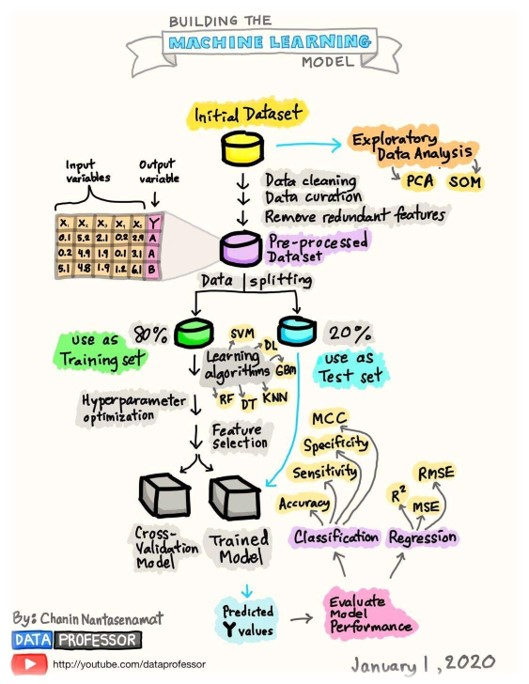

#Understanding System

Lets have look at

[Self Checkout Kiosk](https://youtu.be/Stt7k7YKzxA)

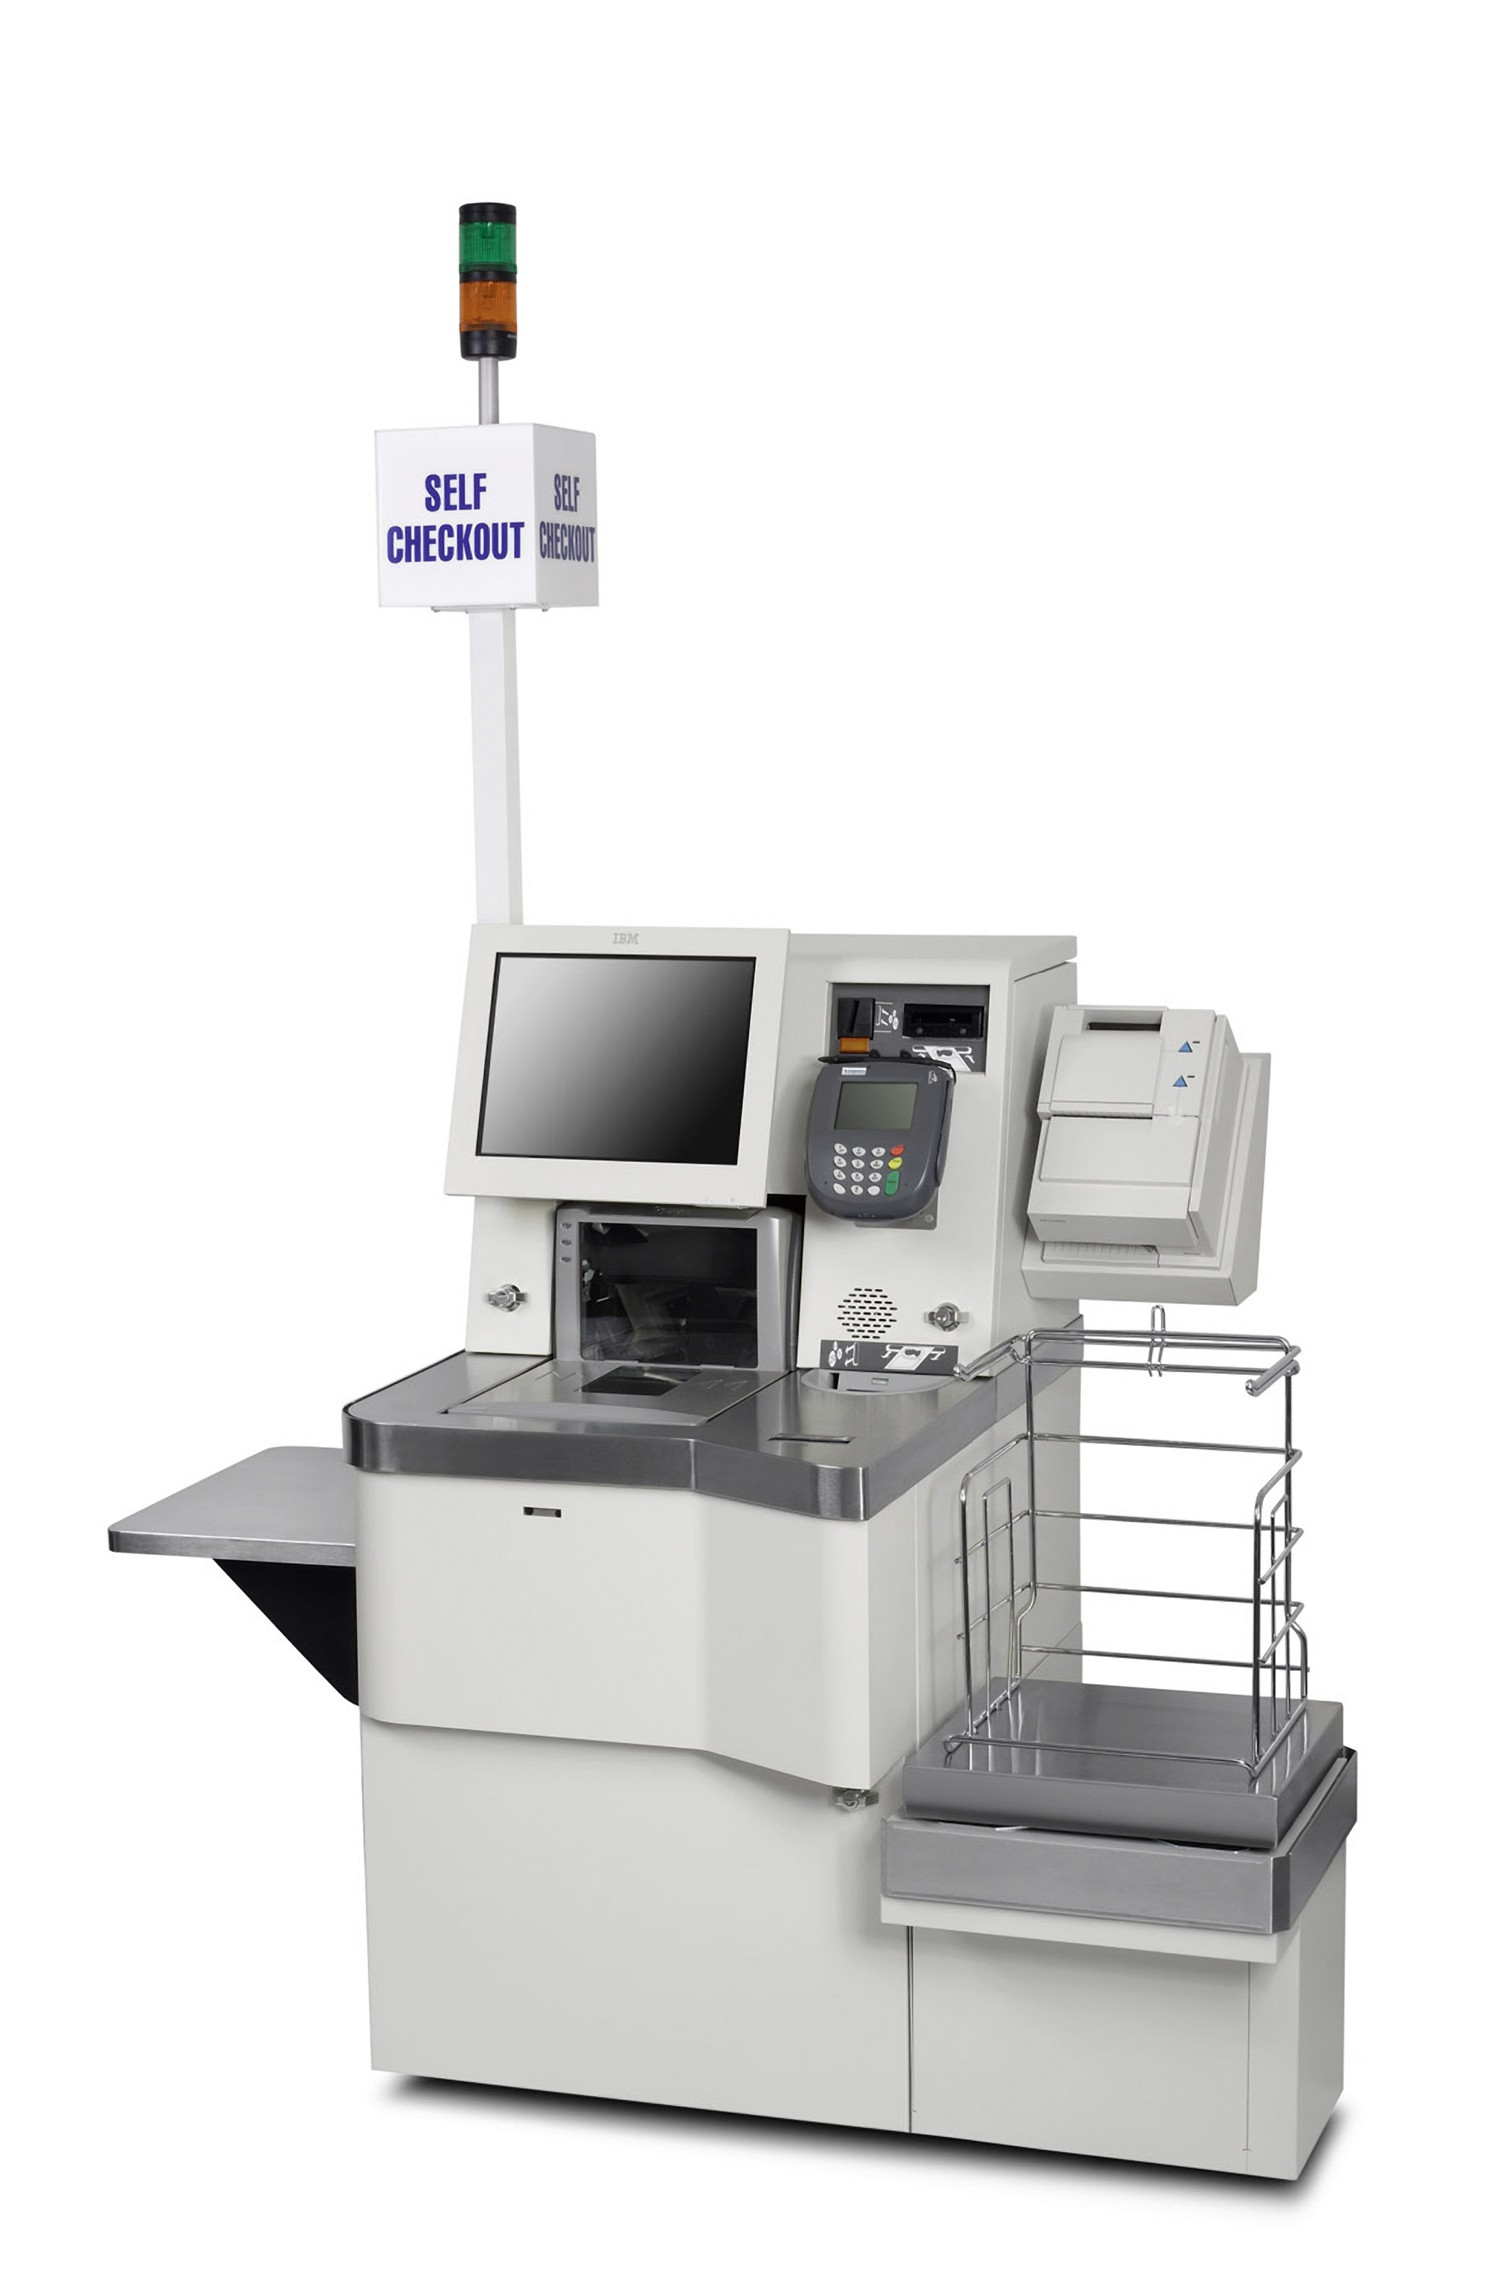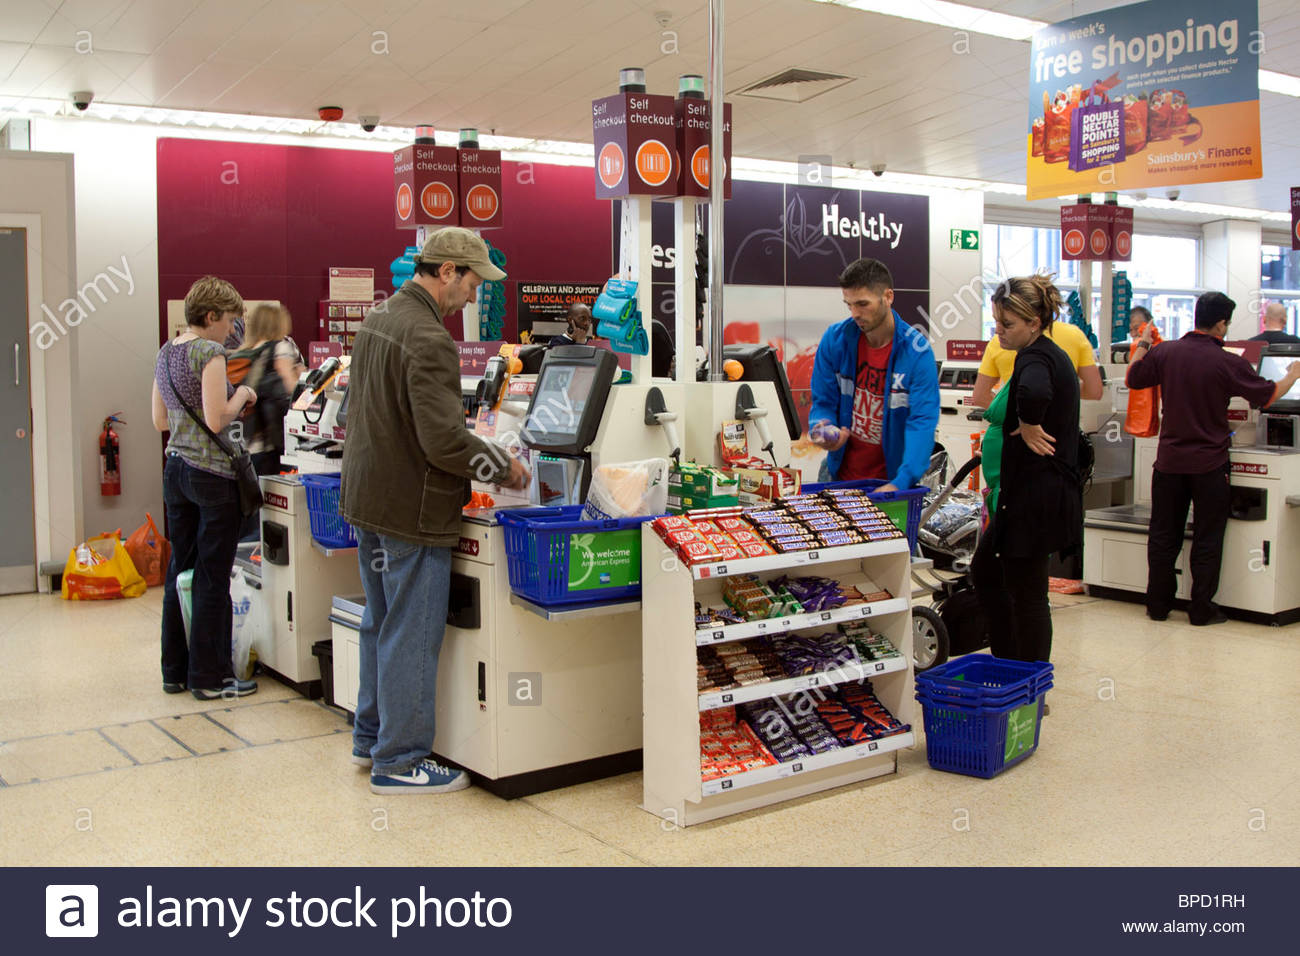

#1. Understanding Task

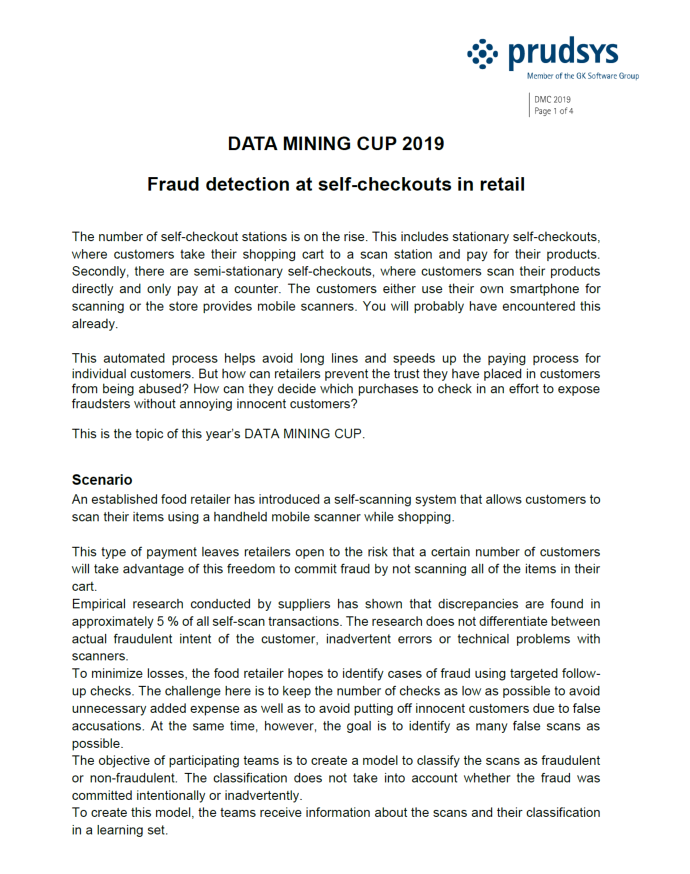

#2. Data Understanding

---



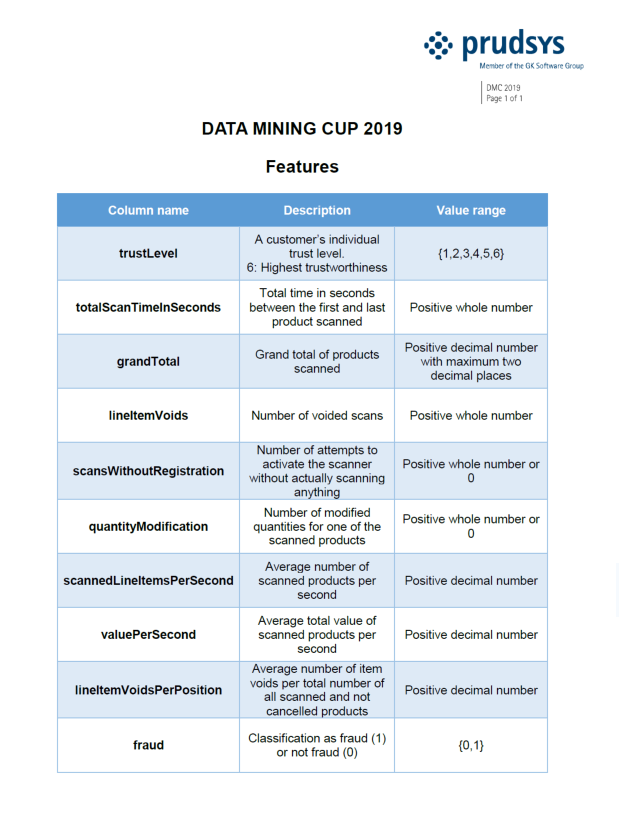

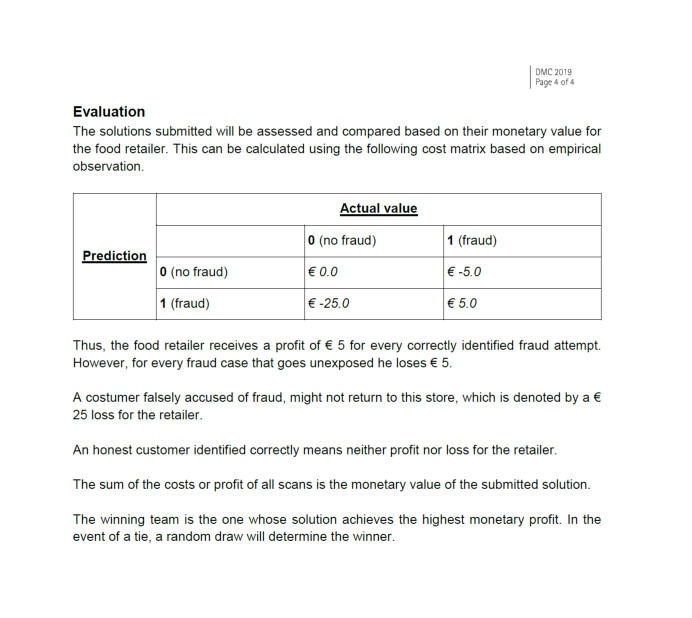

#3. Data Loading

In [ ]:
# download the DMC 2019 dataset from https://www.data-mining-cup.com/reviews/dmc-2019/# 

# And upload it to colab
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
# Use read_csv from pandas to read the file for proceesing

df = pd.read_csv("train.csv", sep = '|' )
df.head(3)


In [ ]:
df.tail()

#2. Perform EDA using following steps
---



In [ ]:
#display column names
df.columns

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
# Check if there are any columns with empty/null dataset ?
print('Check if there are any columns with empty/null dataset ?')
print(df.isnull().sum())

In [ ]:
print('correlation between all predative features w.r.t "fraud" (target) feature')
cor = df.corr()['fraud']
print(cor)

In [ ]:
# Plot a heatmap of the correlation matrix obtained above.
print('heatmap of the correlation matrix ')
import seaborn as sb 
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True) #rainbow

In [ ]:
# Plot a heatmap of the correlation matrix obtained above.
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
print('heatmap of the correlation matrix ')
import seaborn as sb 
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True) #rainbow

# 3. Data cleaning and pre-processing
---



# 4 Classification

# lets understand first
https://www.saedsayad.com/decision_tree.htm 

In [ ]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC




from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.head()

In [ ]:
# Data Preprocessing
# Data preprocessing involves 
# (1) Dividing the data into attributes and labels and 
# (2) dividing the data into training and testing sets.
# To divide the data into attributes and labels, do :
X = df.drop('fraud', axis=1)  
y = df['fraud']  

# the final preprocessing step is to divide data into training and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

print(X)
print('\n\n\n')
print(X_train)
print(X_test)
print('\n\n\n')
print(y_train)
print(y_test)

In [ ]:
dt = DecisionTreeClassifier()
dtree = dt.fit(X_train, y_train)

In [ ]:
predictions = dt.predict(X_test)
print(accuracy_score(y_test, predictions))
print('\n\n\n')
print(confusion_matrix(y_test, predictions))
print('\n\n\n')
print(classification_report(y_test, predictions))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree,X_test, y_test,values_format = '')
plt.show()

In [ ]:
col = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']

In [ ]:
import graphviz 
from sklearn.tree import export_graphviz

feature_names = col

dot_data = export_graphviz(dtree, out_file=None, feature_names=col, class_names=True, filled=True, rounded=True,   special_characters=True)  
graph = graphviz.Source(dot_data)

graph

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = col,class_names=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('frauddetect.png')
Image(graph.create_png())

In [ ]:
!pip install dtreeviz

In [ ]:
col = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']

from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dtree, X_train, y_train, target_name="fraud", feature_names=col, class_names=list(df.fraud))

viz


In [ ]:
# Make predictions on validation dataset
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
predictions = ada.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

#Find the best parameters for the classifier 


In [ ]:
for i in range(100, 600, 100):
  print(i)

In [ ]:
# Make predictions on validation dataset
for i in range(100, 600, 100):
  ada = AdaBoostClassifier(n_estimators=i)
  ada.fit(X_train, y_train)
  predictions = ada.predict(X_test)
  print(i,accuracy_score(y_test, predictions))

# Predict fraud
## for single record

In [ ]:
dummy = pd.DataFrame([[5,76,23.84,9,6,0,0.0261096605744125,0.0311227154046997,0.45]], columns = col )  
dummy

In [ ]:
dummypred = ada.predict(dummy)
dummypred

# Predict fraud
## for test.csv

In [ ]:
# you already downloaded test.csv
# but its too large to get uploaded quickly
# so download smalltest.csv ie first 100 rows of test.csv and predict fraud for then
# https://drive.google.com/file/d/1152hSyqCD3J_v6HmU__Jm7YUn75wELvD/view?usp=sharing

# And upload it to colab
from google.colab import files
files.upload()

Saving test.csv to test (2).csv


In [ ]:
testset = pd.read_csv("test.csv", sep="|", header=0)
predictions = ada.predict(testset)

In [ ]:
dfo = pd.DataFrame(predictions)
dfo.to_csv('krantipred.csv',index=False,header = None)

# Thank You :-)

---


---
